## Reference from Deep learning for Computer Vision

In [84]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2

In [85]:
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        # initialize the list of weights matrices, then store the
        # network architecture and learning rate
        self.W = []
        self.layers = layers
        self.alpha = alpha

        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in range(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layer together,
            # adding an extra node for the bias
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))

        # the last two layers are a special case where the input
        # connections need a bias term but the output does not
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
        
    def sigmoid(self, x):
            # compute and return the sigmoid activation value for a
        # given input value
        return 1.0 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that `x` has already been passed through the `sigmoid`
        # function
        return x * (1 - x)

    def fit(self, X, y, epochs=1000):
        history = []
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        # loop over the desired number of epochs
        for epoch in range(0, epochs):
            # loop over each individual data point and train
            # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)

            # check to see if we should display a training update
            loss = self.calculate_loss(X, y)
            history.append(loss)
        return history  

    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it's just the input
        # feature vector itself
        A = [np.atleast_2d(x)]

        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in range(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])

            # computing the "net output" is simply applying our
            # non-linear activation function to the net input
            out = self.sigmoid(net)

            # once we have the net output, add it to our list of
            # activations
            A.append(out)

        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target
        # value
        error = A[-1] - y

        # from here, we need to apply the chain rule and build our
        # list of deltas `D`; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [error * self.sigmoid_deriv(A[-1])]

        # once you understand the chain rule it becomes super easy
        # to implement with a `for` loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in range(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the non-linear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)

        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]

        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in range(0, len(self.W)):
            # update our weights by taking the dot product of the layer
            # activations with their respective deltas, then multiplying
            # this value by some small learning rate and adding to our
            # weight matrix -- this is where the actual "learning" takes
            # place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self, X, addBias=True):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)

        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            p = np.c_[p, np.ones((p.shape[0]))]

        # loop over our layers in the network
        for layer in range(0, len(self.W)):
            # computing the output prediction is as simple as taking
            # the dot product between the current activation value `p`
            # and the weight matrix associated with the current layer,
            # then passing this value through a non-linear activation
            # function
            p = self.sigmoid(np.dot(p, self.W[layer]))

        # return the predicted value
        return p

    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = np.mean(np.abs(predictions - targets))

        # return the loss
        return loss

# More explain about compute the derivative function (in Vietnamese)

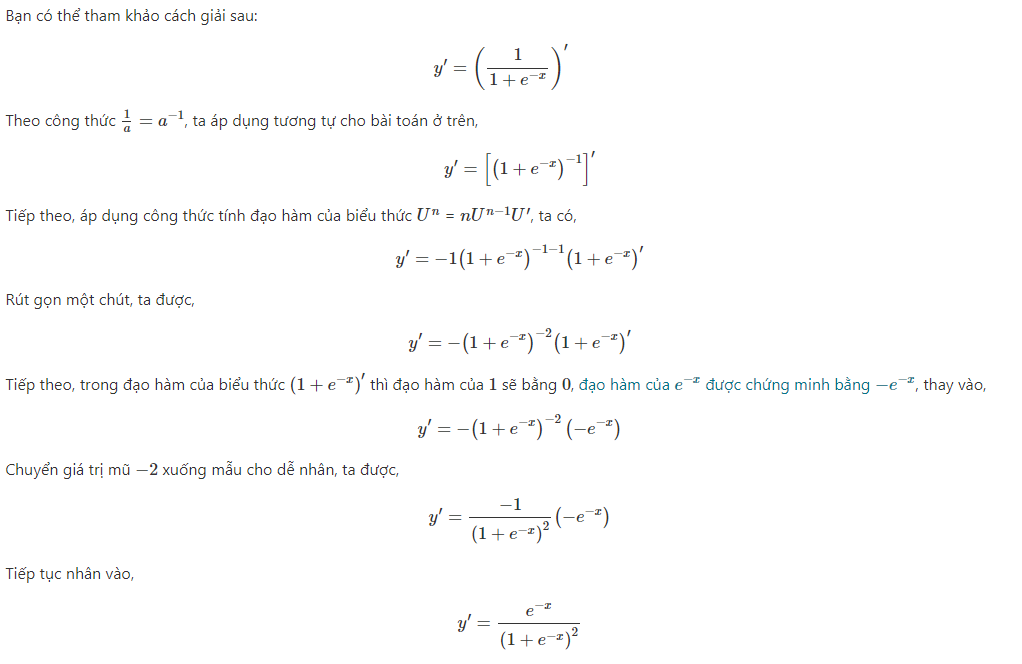

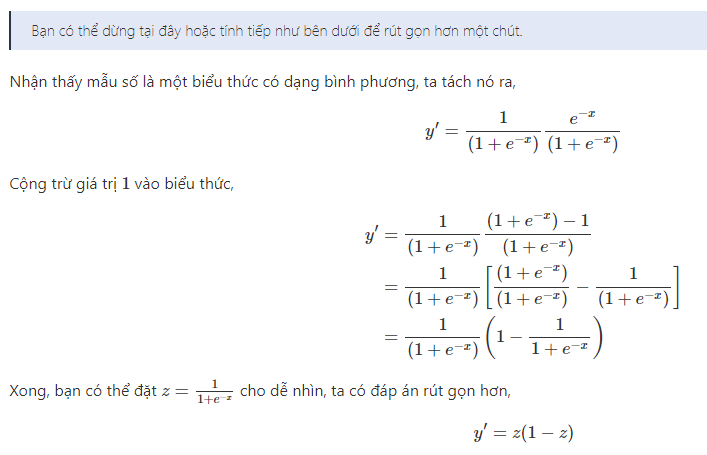

In [86]:
nn = NeuralNetwork((64, 32, 16, 10))

In [87]:
# read dataset
digits = datasets.load_digits()
X = digits.data.astype("float")
print(X.shape)
Y = digits.target

(1797, 64)


In [88]:
def show_image(X):
    num = 10
    im_display = np.ones((8*num + num, 8*num + num), dtype=np.float32)
    for i in range(num*num):
        im = X[i].copy()
        im = im.reshape((8,8))
        col = i % num
        row = i // num
        im_display[row*8 + row:row*8 + 8 + row, col*8 + col:col*8+8 + col] = im
    im_display = im_display.astype(np.uint8)
    plt.imshow(im_display)
    

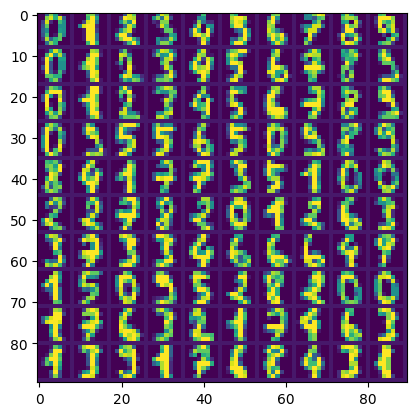

In [89]:
show_image(X)

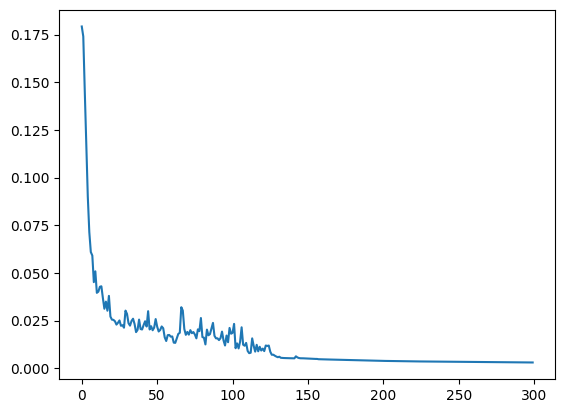

In [90]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.25)
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)
history = nn.fit(trainX, trainY, epochs=300)
plt.plot(history)
plt.show()

In [91]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.86      0.95      0.90        39
           2       0.92      0.94      0.93        36
           3       0.92      1.00      0.96        45
           4       0.96      0.96      0.96        56
           5       0.98      0.92      0.95        52
           6       1.00      0.95      0.98        44
           7       0.94      0.96      0.95        48
           8       0.97      0.84      0.90        37
           9       0.96      0.94      0.95        48

    accuracy                           0.95       450
   macro avg       0.95      0.94      0.94       450
weighted avg       0.95      0.95      0.95       450

